# **Finding Lane Lines on the Road** 
***
In this project, you will use the tools you learned about in the lesson to identify lane lines on the road.  You can develop your pipeline on a series of individual images, and later apply the result to a video stream (really just a series of images). Check out the video clip "raw-lines-example.mp4" (also contained in this repository) to see what the output should look like after using the helper functions below. 

Once you have a result that looks roughly like "raw-lines-example.mp4", you'll need to get creative and try to average and/or extrapolate the line segments you've detected to map out the full extent of the lane lines.  You can see an example of the result you're going for in the video "P1_example.mp4".  Ultimately, you would like to draw just one line for the left side of the lane, and one for the right.

---
Let's have a look at our first image called 'test_images/solidWhiteRight.jpg'.  Run the 2 cells below (hit Shift-Enter or the "play" button above) to display the image.

**Note** If, at any point, you encounter frozen display windows or other confounding issues, you can always start again with a clean slate by going to the "Kernel" menu above and selecting "Restart & Clear Output".

---

**The tools you have are color selection, region of interest selection, grayscaling, Gaussian smoothing, Canny Edge Detection and Hough Tranform line detection.  You  are also free to explore and try other techniques that were not presented in the lesson.  Your goal is piece together a pipeline to detect the line segments in the image, then average/extrapolate them and draw them onto the image for display (as below).  Once you have a working pipeline, try it out on the video stream below.**

---

<figure>
 <img src="line-segments-example.jpg" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above) after detecting line segments using the helper functions below </p> 
 </figcaption>
</figure>
 <p></p> 
<figure>
 <img src="laneLines_thirdPass.jpg" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your goal is to connect/average/extrapolate line segments to get output like this</p> 
 </figcaption>
</figure>

In [2]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)


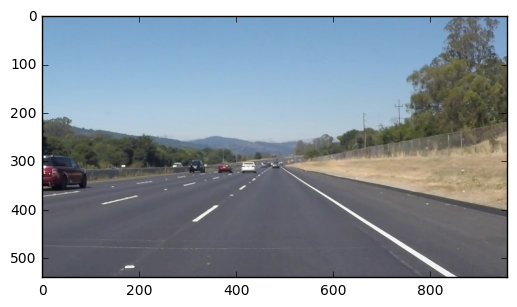

In [3]:
#reading in an image
image = mpimg.imread('test_images/solidWhiteRight.jpg')
#printing out some stats and plotting
print('This image is:', type(image), 'with dimesions:', image.shape)
plt.imshow(image)  # if you wanted to show a single color channel image called 'gray', for example, call as plt.imshow(gray, cmap='gray')

**Some OpenCV functions (beyond those introduced in the lesson) that might be useful for this project are:**

`cv2.inRange()` for color selection  
`cv2.fillPoly()` for regions selection  
`cv2.line()` to draw lines on an image given endpoints  
`cv2.addWeighted()` to coadd / overlay two images
`cv2.cvtColor()` to grayscale or change color
`cv2.imwrite()` to output images to file  
`cv2.bitwise_and()` to apply a mask to an image

**Check out the OpenCV documentation to learn about these and discover even more awesome functionality!**

Below are some helper functions to help get you started. They should look familiar from the lesson!

In [4]:
print()
  plt.imshow(result)
  plt.show()

## Test on Images

Now you should build your pipeline to work on the images in the directory "test_images"  
**You should make sure your pipeline works well on these images before you try the videos.**

In [ ]:
import os
os.listdir("test_images/")

run your solution on all test_images and make copies into the test_images directory).

Output Corresponing to the original file: solidWhiteCurve.jpg


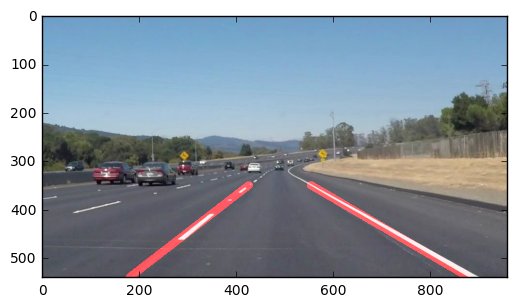

Output Corresponing to the original file: solidYellowCurve.jpg


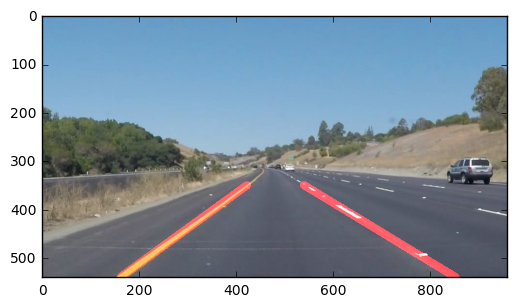

Output Corresponing to the original file: whiteCarLaneSwitch.jpg


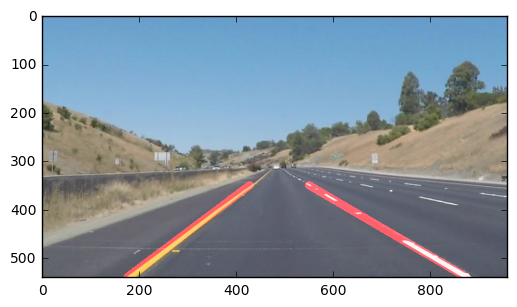

Output Corresponing to the original file: solidYellowLeft.jpg


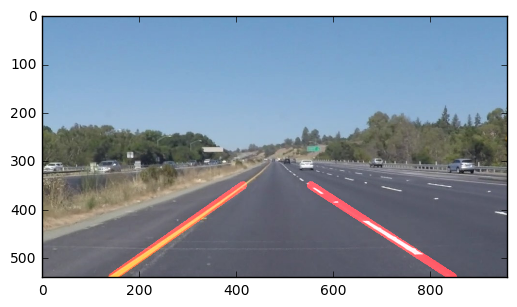

Output Corresponing to the original file: solidYellowCurve2.jpg


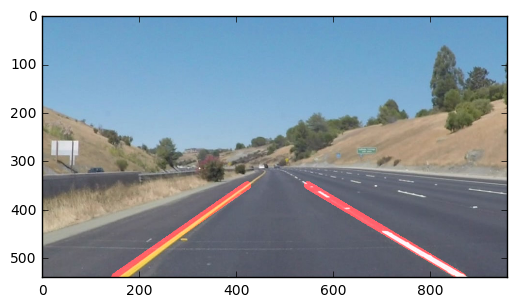

Output Corresponing to the original file: solidWhiteRight.jpg


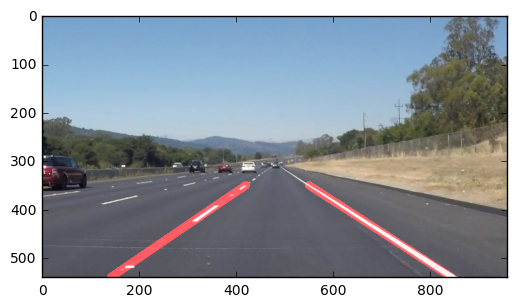

In [8]:
# TODO: Build your pipeline that will draw lane lines on the test_images
# then save them to the test_images directory.
# ******Parts of the code are followed by viewing the material provided******

# The algorithm is based on canny edge detection and hough transform
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import os
in_imgs=os.listdir('test_images/')
path='test_images/'
out_file=['solidWhiteCurve_out.jpg','solidWhiteRight_out.jpg','solidYellowCurve_out.jpg','solidYellowCurve2_out.jpg',
'solidYellowLeft_out.jpg','whiteCarLaneSwitch_out.jpg']


def process_image(image_f,in_file): #function for processign single image/frame
  grayim=cv2.cvtColor(image_f,cv2.COLOR_RGB2GRAY)

#Kernel parameter and Gaussian blurring
  kernel_size=5
  blurgra_im= cv2.GaussianBlur(grayim,(kernel_size, kernel_size),0)

#canny edge detection
  low_threshold = 50
  high_threshold = 150
  edges = cv2.Canny(blurgra_im, low_threshold, high_threshold)

# Next we'll create a masked edges image using cv2.fillPoly()
  mask = np.zeros_like(edges) 
  ignore_mask_color = 255 

# This time we are defining a four sided polygon to mask(470, 300), (485, 330)
  imshape = image_f.shape
  vertices = np.array([[(80,imshape[0]),(480, 300), (485, 300), (imshape[1]-80,imshape[0])]], dtype=np.int32)
  cv2.fillPoly(mask, vertices, ignore_mask_color)
  masked_edges = cv2.bitwise_and(edges, mask)

# Make a blank the same size as our image to draw on
  rho = 2
  theta = np.pi/180
  threshold = 15
  min_line_length = 5
  max_line_gap = 1
  line_image = np.copy(image_f)*0 #creating a blank to draw lines on

# Run Hough on edge detected image
  lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),min_line_length, max_line_gap)


# Iterate over the output "lines" and classifying points of lane
  n_sx_points=[]
  n_sy_points=[]
  p_sy_points=[]
  p_sx_points=[]
  for line in lines:
     for x1,y1,x2,y2 in line:
        m=round((y2-y1)/(x2-x1),2)
        if m<0:
         n_sx_points.append(x1)
         n_sx_points.append(x2)
         n_sy_points.append(y1)
         n_sy_points.append(y2)
        elif m>0:
         p_sx_points.append(x1)
         p_sx_points.append(x2)
         p_sy_points.append(y1)
         p_sy_points.append(y2)

#curve fitting the points forming the lane
  neg_param=np.polyfit(n_sx_points,n_sy_points,1)
  pos_param=np.polyfit(p_sx_points,p_sy_points,1)


#finding the edges of annotation marks
  x1=(int((350-neg_param[1])/neg_param[0]))
  x2=(int((350-pos_param[1])/pos_param[0]))
  x3=(int((imshape[0]-neg_param[1])/neg_param[0]))
  x4=(int((imshape[0]-pos_param[1])/pos_param[0]))

# Draw Annotations on original image
  cv2.line(line_image,(x1,350),(x3,imshape[0]),(255,0,0),15)
  cv2.line(line_image,(x2,350),(x4,imshape[0]),(255,0,0),15)
  result = cv2.addWeighted(image_f, 1, line_image, 1, 0)
  print('Output Corresponing to the original file:',in_file)
  plt.imshow(result)
  plt.show()
  return result

#pipelining loop
for idx,in_img in enumerate(in_imgs):
 image=mpimg.imread(path+in_img)
 res=process_image(image,in_img)
 cv2.imwrite(path+out_file[idx],res)


## Test on Videos

You know what's cooler than drawing lanes over images? Drawing lanes over video!

We can test our solution on two provided videos:

`solidWhiteRight.mp4`

`solidYellowLeft.mp4`

In [21]:
# Import everything needed to edit/save/watch video clips
# ******Parts of the code are followed by viewing the material provided******
from moviepy.editor import VideoFileClip
from IPython.display import HTML
import numpy as np
import cv2

In [22]:
# Global variables for normalizing annotated line 
sum_posslp=0.0
sum_negslp=0.0
sum_posint=0.0
sum_negint=0.0
fn=0

def process_image(image):
# NOTE: The output you return should be a color image (3 channel) for processing video below
# TODO: put your pipeline here,
# you should return the final output (image with lines are drawn on lanes)
  global fn
  global sum_posslp
  global sum_negslp
  global sum_posint
  global sum_negint
  grayim=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
  fn=fn+1
#Kernel parameter and Gaussian blurring
  kernel_size=5
  blurgra_im= cv2.GaussianBlur(grayim,(kernel_size, kernel_size),0)

#canny edge detection
  low_threshold = 50
  high_threshold = 150
  edges = cv2.Canny(blurgra_im, low_threshold, high_threshold)

# Next we'll create a masked edges image using cv2.fillPoly()
  mask = np.zeros_like(edges) 
  ignore_mask_color = 255 

# This time we are defining a four sided polygon to mask(470, 300), (485, 330)
  imshape = image.shape
  vertices = np.array([[(80,imshape[0]),(480, 280), (485, 280), (imshape[1]-80,imshape[0])]], dtype=np.int32)
  cv2.fillPoly(mask, vertices, ignore_mask_color)
  masked_edges = cv2.bitwise_and(edges, mask)

# Make a blank the same size as our image to draw on
  rho = 2
  theta = np.pi/180
  threshold = 15
  min_line_length = 5
  max_line_gap = 1
  line_image = np.copy(image)*0 #creating a blank to draw lines on

# Run Hough on edge detected image
  lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),min_line_length, max_line_gap)


# Iterate over the output "lines" and classifying points of lane
  n_sx_points=[]
  n_sy_points=[]
  p_sy_points=[]
  p_sx_points=[]
  for line in lines:
     for x1,y1,x2,y2 in line:
        m=round((y2-y1)/(x2-x1),3)
        if m<0:
         n_sx_points.append(x1)
         n_sx_points.append(x2)
         n_sy_points.append(y1)
         n_sy_points.append(y2)
        elif m>0:
         p_sx_points.append(x1)
         p_sx_points.append(x2)
         p_sy_points.append(y1)
         p_sy_points.append(y2)

#curve fitting the points forming the lane
  neg_param=np.polyfit(n_sx_points,n_sy_points,1)
  pos_param=np.polyfit(p_sx_points,p_sy_points,1)

#Finding averge to avoid deviations in successive frames
  sum_posslp=sum_posslp+pos_param[0]
  sum_negslp=sum_negslp+neg_param[0]
  sum_posint=sum_posint+pos_param[1]
  sum_negint=sum_negint+neg_param[1]
  a1=sum_posslp/fn
  a2=sum_negslp/fn
  b1=sum_posint/fn
  b2=sum_negint/fn

#finding the edges for annotation marks
  x1=(int((350-b2)/a2))#(x1 with y1=350) for first line with negetive slope
  x2=(int((350-b1)/a1))#(x2 with y2=350) for second line with positive slope
  x3=(int((imshape[0]-b2)/a2))#(x3 with y3=end of the frame) for first line with negetive slope
  x4=(int((imshape[0]-b1)/a1))#(x4 with y4=end of the frame) for second line with positive slope

# Draw Annotations on original image
  cv2.line(line_image,(x1,350),(x3,imshape[0]),(255,0,0),10)
  cv2.line(line_image,(x2,350),(x4,imshape[0]),(255,0,0),10)
  result = cv2.addWeighted(image, 1, line_image, 1, 0)
  return result

Let's try the one with the solid white lane on the right first ...

In [23]:
white_output = 'white.mp4'
clip1 = VideoFileClip("solidWhiteRight.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

[MoviePy] >>>> Building video white.mp4
[MoviePy] Writing video white.mp4


100%|█████████▉| 221/222 [00:06<00:00, 31.69it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: white.mp4 

CPU times: user 46.6 s, sys: 412 ms, total: 47 s
Wall time: 7.53 s


Play the video inline, or if you prefer find the video in your filesystem (should be in the same directory) and play it in your video player of choice.

In [25]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

**At this point, if you were successful you probably have the Hough line segments drawn onto the road, but what about identifying the full extent of the lane and marking it clearly as in the example video (P1_example.mp4)?  Think about defining a line to run the full length of the visible lane based on the line segments you identified with the Hough Transform.  Modify your draw_lines function accordingly and try re-running your pipeline.**

Now for the one with the solid yellow lane on the left. This one's more tricky!

In [26]:
yellow_output = 'yellow.mp4'
clip2 = VideoFileClip('solidYellowLeft.mp4')
yellow_clip = clip2.fl_image(process_image)
%time yellow_clip.write_videofile(yellow_output, audio=False)

[MoviePy] >>>> Building video yellow.mp4
[MoviePy] Writing video yellow.mp4


100%|█████████▉| 681/682 [00:25<00:00, 26.25it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: yellow.mp4 

CPU times: user 2min 55s, sys: 1.36 s, total: 2min 56s
Wall time: 26.5 s


In [27]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(yellow_output))

## Reflections

Congratulations on finding the lane lines!  As the final step in this project, we would like you to share your thoughts on your lane finding pipeline... specifically, how could you imagine making your algorithm better / more robust?  Where will your current algorithm be likely to fail?

Please add your thoughts below,  and if you're up for making your pipeline more robust, be sure to scroll down and check out the optional challenge video below!


In [ ]:
# The Results obtained above seems to be sufficient but following factors have not been considered in the algorithm 
#  implemented above:
#  1) Curves and turnings where canny edge detection will work but hough transform may fail in curved  scenarios
#  2) When there are variations in the road color the edges are hard to detect
#  2) The interpolated lines used for annotations are obtained by curve fitting which is the simplest scenario. There are other techniques like regression which can be used
#  3) Though the line is annotated properly on the image when the video processing is done there is wobbling effect on lines, which can be reduced by chosing strong candidates
#  4) Currently all the frames are being processed but later we can choose the best frames by applying machine learning techniques


## Submission

If you're satisfied with your video outputs it's time to submit!  Submit this ipython notebook for review.


## Optional Challenge

Try your lane finding pipeline on the video below.  Does it still work?  Can you figure out a way to make it more robust?  If you're up for the challenge, modify your pipeline so it works with this video and submit it along with the rest of your project!

In [ ]:
challenge_output = 'extra.mp4'
clip2 = VideoFileClip('challenge.mp4')
challenge_clip = clip2.fl_image(process_image)
%time challenge_clip.write_videofile(challenge_output, audio=False)

In [ ]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(challenge_output))